In [1]:
!pipenv install scapy

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
Installing scapy...
Adding scapy to Pipfile's [packages]...
✔ Installation Succeeded 
Pipfile.lock (58b1f9) out of date, updating to (772d79)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! 
Locking [dev-packages] dependencies...
Updated Pipfile.lock (772d79)!
Installing dependencies from Pipfile.lock (772d79)...


In [135]:
from scapy.all import *
#load the pcap
# BENCH_NO_MEDIA_RELAY="bench_without_rtpengine.pcap"
# BENCH_WITH_MEDIA_RELAY="bench_with_rtpengine.pcap"

BENCH_NO_MEDIA_RELAY="/home/efficacy38/without_rtpengine_1.pcap"
BENCH_WITH_MEDIA_RELAY="/home/efficacy38/with_rtpengine_1.pcap"
without_rtpengine_pcap = rdpcap(BENCH_NO_MEDIA_RELAY)
with_rtpengine_pcap = rdpcap(BENCH_WITH_MEDIA_RELAY)

In [136]:
import re

In [137]:
def generate_report(pkts):
    call_start_time = {}
    for pkt in pkts:
        if 'INVITE sip:1010@10.22.149.230' in str(pkt):
            call_id = re.findall(r"Call-ID: ([a-zA-Z0-9\-~]+)\\r\\n", str(pkt))[0]
            call_start_time[call_id] = pkt.time

    call_established_time = {}
    for call_id, start_time in call_start_time.items():
        for pkt in pkts:
            raw_pkt = str(raw(pkt))
            if '200 Ok' in raw_pkt and call_id in raw_pkt and 'CSeq: 20' in raw_pkt:
                call_established_time[call_id] = pkt.time - call_start_time[call_id]

    candidate = sorted(call_established_time.values())[20:80]
    tmp = 0
    for time in candidate:
        tmp += time
    print(tmp / len(call_established_time))
    return call_established_time


In [147]:
without_rtpengine_report = generate_report(without_rtpengine_pcap)
with_rtpengine_report = generate_report(with_rtpengine_pcap)

0.39439906
0.46514486


In [139]:
!pipenv install matplotlib

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
Installing matplotlib...
Adding matplotlib to Pipfile's [packages]...
✔ Installation Succeeded 
Installing dependencies from Pipfile.lock (98e27c)...


In [144]:
x1 = list(range(0, 100))
x2 = x1

y1 = without_rtpengine_report.values()
y2 = with_rtpengine_report.values()

full_range = [i for i in y1]
full_range.extend(y2)
full_range = sorted(full_range)
print(full_range[::int(len(full_range) / 5)], full_range[-1])

[Decimal('0.392430'), Decimal('0.585919'), Decimal('0.680285'), Decimal('0.738488'), Decimal('0.812266')] 0.928984


In [170]:
TIME_START=2
TIME_END=10
eps = 1e-5

time_range = ['{:.1f}-{:.1f}'.format(i/10 + eps, (i+1) / 10 + eps) for i in range(TIME_START, TIME_END)]
print(time_range)
def summary(vals):
    tmp = [0 for i in range(TIME_START, TIME_END)]
    for i in range(TIME_START, TIME_END):
        for val in vals:
            val *= 10
            if val > i and val <= i+1:
                tmp[i - 2]+=1
    return tmp

summary_without_rtpengine = summary(without_rtpengine_report.values())
summary_with_rtpengine = summary(with_rtpengine_report.values())

trim_summary_without_rtpengine = summary(list(without_rtpengine_report.values())[20:80])
trim_summary_with_rtpengine = summary(list(with_rtpengine_report.values())[20:80])

['0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']


In [171]:
print(summary_without_rtpengine, summary_with_rtpengine)

[0, 1, 12, 20, 30, 37, 0, 0] [0, 0, 2, 11, 16, 25, 39, 7]


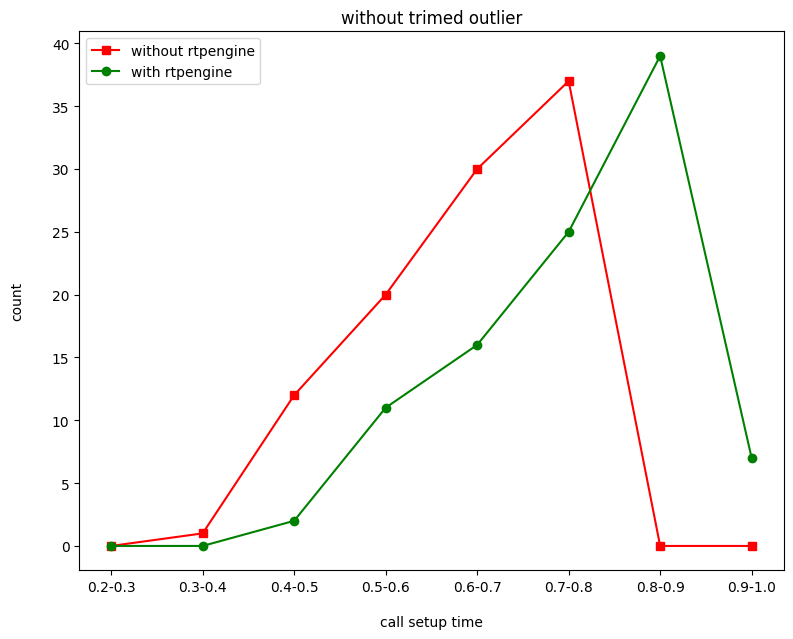

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(time_range,summary_without_rtpengine,'s-',color = 'r', label="without rtpengine")
plt.plot(time_range,summary_with_rtpengine,'o-',color = 'g', label="with rtpengine")

plt.title("without trimed outlier")
# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("call setup time", labelpad = 15)
# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("count", labelpad = 20)
plt.legend(loc = "best")


# plt.subplot(1,2,2)
# plt.plot(time_range,trim_summary_without_rtpengine,'s-',color = 'r', label="without rtpengine")
# plt.plot(time_range,trim_summary_with_rtpengine,'o-',color = 'g', label="with rtpengine")

# plt.title("trimed outlier")
# # 標示x軸(labelpad代表與圖片的距離)
# plt.xlabel("call setup time", labelpad = 15)
# # 標示y軸(labelpad代表與圖片的距離)
# plt.ylabel("count", labelpad = 20)
# plt.legend(loc = "best")